In [1]:
import pandas as pd
import scipy.stats as sts
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import itertools
import seaborn as sns
sns.set()

In [2]:
ege_phys = [95, 90, 86, 82, 75, 75, 64, 60, 57, 50]
ege_math = [92, 94, 83, 80, 55, 60, 45, 72, 61, 70]

ege = pd.DataFrame({'ege_phys': ege_phys, 'ege_math': ege_math})

print('kendall:')
print(ege.corr(method='kendall'))
print('spearman')
print(ege.corr(method='spearman'))

kendall:
          ege_phys  ege_math
ege_phys  1.000000  0.494413
ege_math  0.494413  1.000000
spearman
          ege_phys  ege_math
ege_phys   1.00000   0.64438
ege_math   0.64438   1.00000


In [3]:
stats.spearmanr(ege_phys, ege_math)

SpearmanrResult(correlation=0.6443798763008685, pvalue=0.04431151432143616)

In [4]:
stats.kendalltau(ege_phys, ege_math)

KendalltauResult(correlation=0.49441323247304414, pvalue=0.04819348829319082)

In [5]:
permutation_criterion_(ege_phys, ege_math, 0.05, method='spearman')

NameError: name 'permutation_criterion_' is not defined

In [6]:
permutation_criterion_(ege_phys, ege_math, 0.05, method='kendall')

NameError: name 'permutation_criterion_' is not defined

### Генерируем данные:

In [2]:
n_tup = (10, 50, 100)

In [3]:
class radius_gen(sts.rv_continuous):
    def _pdf(self, x):
        return 2*x
radius = radius_gen(a=0, b=1, name='radius')

In [4]:
def circle_pt(n, plot=False):
    r = radius.rvs(size=n)
    fi = sts.uniform.rvs(loc=0, scale=2*np.pi, size=n)
    A = r * np.sin(fi)
    B = r * np.cos(fi)
    
    if plot:
        circle1 = plt.Circle((0, 0), 1, color='r', fill=False, alpha=0.5)
        fig, ax = plt.subplots(figsize=(10, 10))
        plt.scatter(B, A)
        plt.xlim(-1, 1)
        plt.ylim(-1, 1)
        ax.add_artist(circle1)
        #ax.add_artist(circle2)
        plt.show()
        
    return B, A

In [5]:
class radius_ring(sts.rv_continuous):
    def _cdf(self, x):
        return 3*x**2 - 2
radius_ring = radius_ring(a = np.sqrt(2/3), b = 1, name='radius_ring')

In [6]:
def ring_pt(n, plot=False):
    r = radius_ring.rvs(size = n)
    fi = sts.uniform.rvs(loc=0, scale=2*np.pi, size=n)
    X = r * np.cos(fi)
    Y = r * np.sin(fi)
    
    if plot:
        circle_in = plt.Circle((0, 0), np.sqrt(2/3), fill=False, color='r')
        circle_out = plt.Circle((0, 0), 1, fill=False, color='r')
        fig, ax = plt.subplots(figsize=(10, 10))
        plt.scatter(X, Y, s = 4)
        ax.add_artist(circle_in)
        ax.add_artist(circle_out)
        plt.show()
    
    return X, Y

In [7]:
def rhombus_pt(n, plot=False):
    X = sts.uniform.rvs(loc=0, scale=1, size=n)
    Y = sts.uniform.rvs(loc=0, scale=1, size=n)
    
    X1 = X*(1/np.sqrt(2)) + Y
    Y1 = X*(1/np.sqrt(2))
    
    if plot:
        fig, ax = plt.subplots(figsize=(10, 10))
        plt.xlim(0, 1.75)
        plt.ylim(0, 1.75)
        plt.scatter(X1, Y1)
        plt.show()
    return X1, Y1

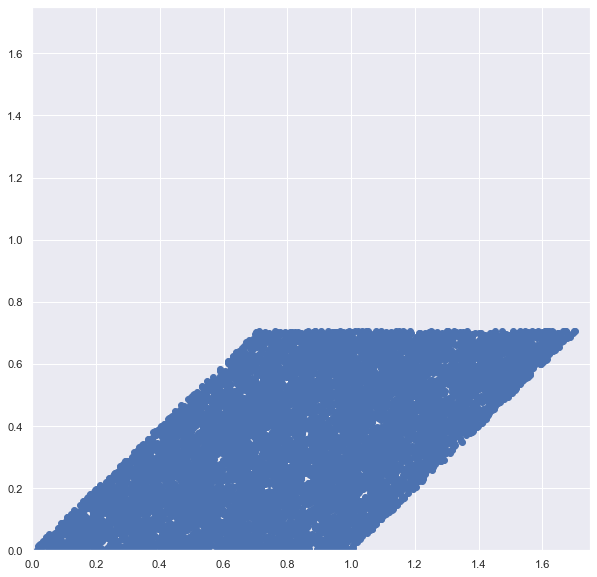

(array([0.71280244, 1.41539545, 0.50906696, ..., 1.22619016, 0.46135921,
        0.90656602]),
 array([0.68667162, 0.58657551, 0.32910015, ..., 0.62990754, 0.37295168,
        0.50075791]))

In [8]:
rhombus_pt(10000, True)

In [9]:
#method: spearman, kendall, pirson
# return:
# 1 - Reject H_{0}
# 0 - Not in critical 
def permutation_criterion_(X, Y, alpha, method='pearson'):
    if method=='spearman': 
        stat = stats.spearmanr(X, Y)[0]
    elif method=='kendall':
        stat = stats.kendalltau(X, Y)[0]
    else:
        stat = stats.pearsonr(X, Y)[0]
        
    coeff = []
    coeff.append(stat)
    
    Y_p = Y.copy()
    
    for i in range(1000):
       # Y_p = np.random.choice(Y, len(Y), replace=False)
        np.random.shuffle(Y_p)
        if method=='spearman': 
            coeff.append(stats.spearmanr(X, Y_p)[0])
        elif method=='kendall':
            coeff.append(stats.kendalltau(X, Y_p)[0])
        else:
            coeff.append(stats.pearsonr(X, Y_p)[0])
            
    coeff.sort()
    N = coeff.index(stat, 0, len(coeff))
    pval = min(N, len(coeff)-N)/500
    if (N < (len(coeff))*(alpha/2)) | (N > (len(coeff))*(1 - alpha/2)):
        return 1, pval
    else:
        return 0, pval

In [10]:
X = stats.norm.rvs(size=100)
Y = stats.norm.rvs(size=100)
res, pval = permutation_criterion_(X, Y, 0.05)
display(res, pval)

0

0.954

<h3> Тестируем критерии

<h4> Независимые X, Y с $N(0, 1)$

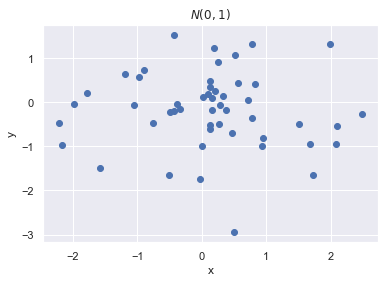

In [11]:
plt.scatter(sts.norm.rvs(size=50), sts.norm.rvs(size=50))
plt.xlabel('x')
plt.ylabel('y')
plt.title('$N(0, 1)$')
#plt.show()
plt.savefig('Norm(0,1).png')

In [12]:
def norm_test(n=50):
    count = [0, 0, 0]
    pvalue_p, pvalue_s, pvalue_k = list(), list(), list()
    for i in range(100):
        X = stats.norm.rvs(size=n)
        Y = stats.norm.rvs(size=n)
        res, pval =  permutation_criterion_(X, Y, 0.05, 'pearson')
        pvalue_p.append(pval)
        if res == 1:
            count[0]+= 1
        res, pval = 0, 0
            
        res, pval = permutation_criterion_(X, Y, 0.05, 'spearman')
        pvalue_s.append(pval)
        if res == 1:
            count[1] += 1
        res, pval = 0, 0    
        
        res, pval = permutation_criterion_(X, Y, 0.05, 'kendall')
        pvalue_k.append(pval)
        if res == 1:
            count[2] += 1
        res, pval = 0, 0
            
    print('Частота Pearson:', count[0]/100)
    print('Частота Spearman:', count[1]/100)
    print('Частота Kendall:', count[2]/100)
    
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))
    domain = np.linspace(0, 1, 2)
    dom_Y = [i/100 for i in range(1, 101)]
    pvalue_p.sort()
    pvalue_s.sort()
    pvalue_k.sort()
    
    ax[0].plot(pvalue_p, dom_Y, label='permut')
    ax[0].plot(domain, domain, '--r')
    ax[0].set_title('P-value for Pearson crit')
    
    ax[1].plot(pvalue_s, dom_Y, label='permut')
    ax[1].plot(domain, domain, '--r')
    ax[1].set_title('P-value for Spearman crit')
    
    ax[2].plot(pvalue_k, dom_Y, label='permut')
    ax[2].plot(domain, domain, '--r')
    ax[2].set_title('P-value for Kendall crit')
    
    pvalue_p, pvalue_s, pvalue_k = list(), list(), list()
    
    #Asimpt 
    for i in range(100): 
        X = sts.norm.rvs(loc=0, scale=1, size=n)
        Y = sts.norm.rvs(loc=0, scale=1, size=n)

        pvalue_s.append(sts.spearmanr(X, Y)[1])
        pvalue_k.append(sts.kendalltau(X, Y)[1])
        pvalue_p.append(sts.pearsonr(X, Y)[1])
    
    pvalue_s.sort()
    pvalue_k.sort()
    pvalue_p.sort()
    
    ax[0].plot(pvalue_p, dom_Y, label='asimpt')
    ax[1].plot(pvalue_s, dom_Y, label='asimpt')
    ax[2].plot(pvalue_k, dom_Y, label='asimpt')
    
    ax[0].legend()
    ax[1].legend()
    ax[2].legend()
    
    plt.show()
    
    print('Критерии Спирмена и Кендалла к этим же данным:')
    print(stats.spearmanr(X, Y))
    print(stats.kendalltau(X, Y))

Частота Pearson: 0.03
Частота Spearman: 0.04
Частота Kendall: 0.03


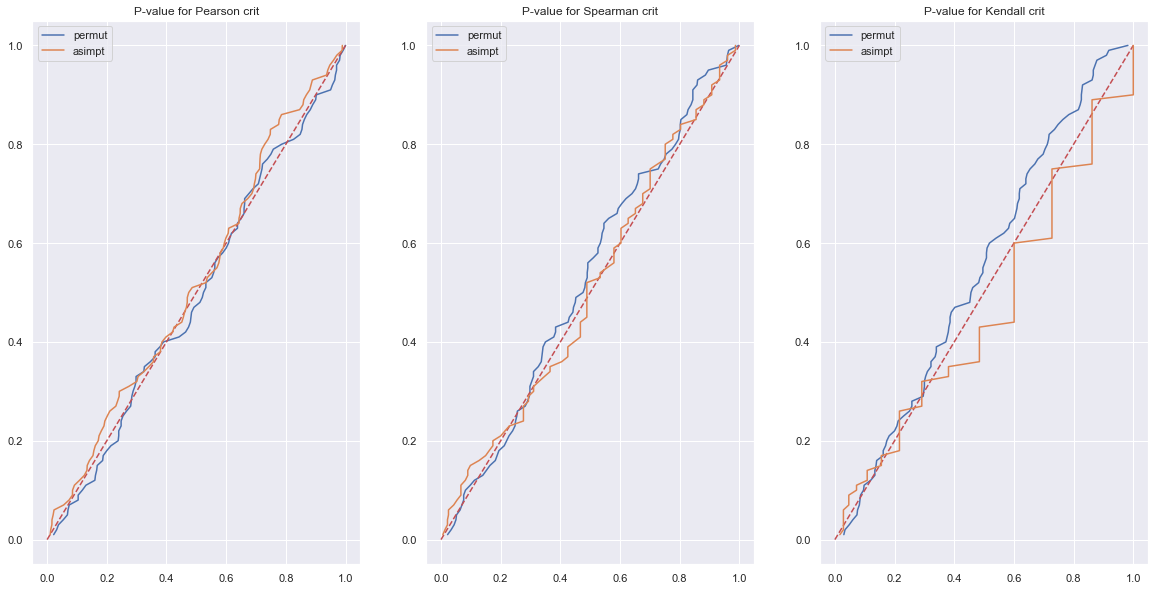

Критерии Спирмена и Кендалла к этим же данным:
SpearmanrResult(correlation=0.43030303030303024, pvalue=0.21449233253280775)
KendalltauResult(correlation=0.28888888888888886, pvalue=0.2912483465608466)


In [13]:
norm_test(10)

Частота Pearson: 0.09
Частота Spearman: 0.08
Частота Kendall: 0.06


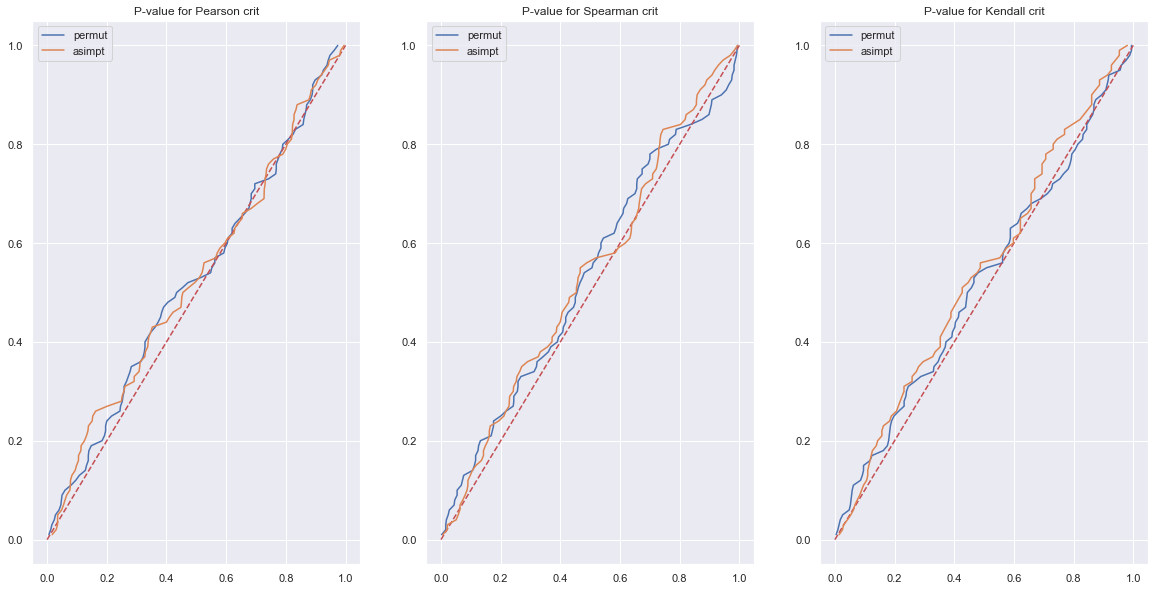

Критерии Спирмена и Кендалла к этим же данным:
SpearmanrResult(correlation=-0.02588235294117647, pvalue=0.8583957461421866)
KendalltauResult(correlation=-0.005714285714285714, pvalue=0.9533073469737826)


In [13]:
norm_test(50)

Частота Pearson: 0.07
Частота Spearman: 0.08
Частота Kendall: 0.09


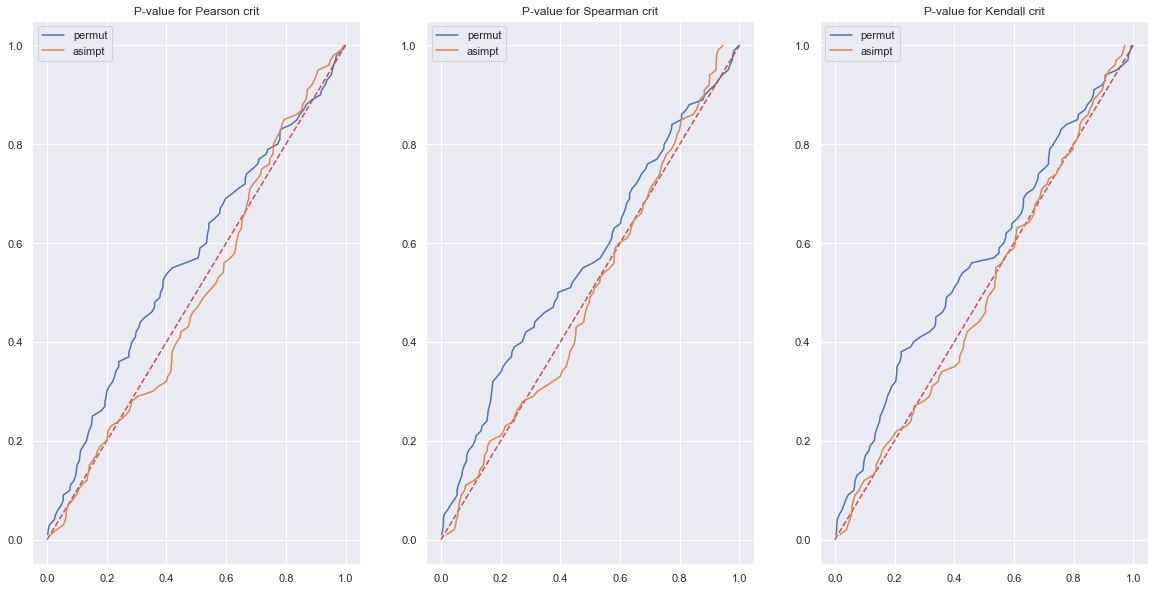

Критерии Спирмена и Кендалла к этим же данным:
SpearmanrResult(correlation=0.06579057905790578, pvalue=0.5154730042022018)
KendalltauResult(correlation=0.05252525252525254, pvalue=0.43874727580551975)


In [14]:
norm_test(100)

<h4>Случайно брошенные в круг радиуса 1 точки (X, Y)

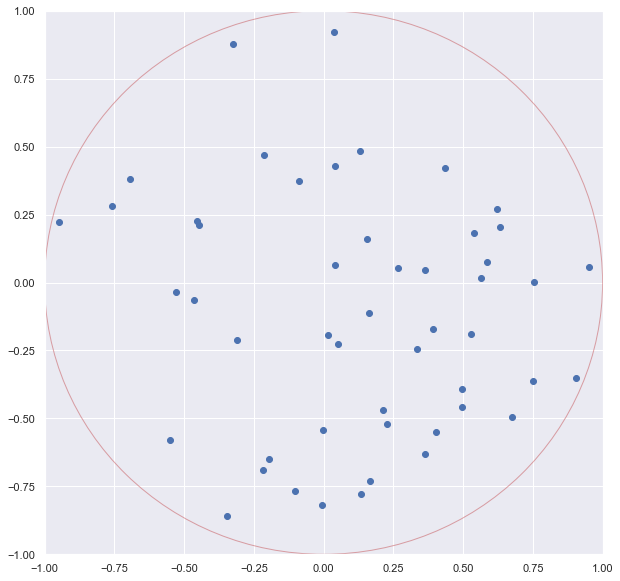

In [15]:
circle_pt(50, True)
plt.show()

In [16]:
def circle_test(n=50):
  #  X, Y = circle_pt(n)
    count = [0, 0, 0]
    pvalue_p, pvalue_s, pvalue_k = list(), list(), list()
    for i in range(100):
        X, Y = circle_pt(n)
        res, pval =  permutation_criterion_(X, Y, 0.05, 'pearson')
        pvalue_p.append(pval)
        if res == 1:
            count[0]+= 1
        res, pval = 0, 0
            
        res, pval = permutation_criterion_(X, Y, 0.05, 'spearman')
        pvalue_s.append(pval)
        if res == 1:
            count[1] += 1
        res, pval = 0, 0    
        
        res, pval = permutation_criterion_(X, Y, 0.05, 'kendall')
        pvalue_k.append(pval)
        if res == 1:
            count[2] += 1
        res, pval = 0, 0
            
    print('Частота Pearson:', count[0]/100)
    print('Частота Spearman:', count[1]/100)
    print('Частота Kendall:', count[2]/100)
    
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))
    domain = np.linspace(0, 1, 2)
    dom_Y = [i/100 for i in range(1, 101)]
    pvalue_p.sort()
    pvalue_s.sort()
    pvalue_k.sort()
    
    ax[0].plot(pvalue_p, dom_Y, label='permut')
    ax[0].plot(domain, domain, '--r')
    ax[0].set_title('P-value for Pearson crit')
    
    ax[1].plot(pvalue_s, dom_Y, label='permut')
    ax[1].plot(domain, domain, '--r')
    ax[1].set_title('P-value for Spearman crit')
    
    ax[2].plot(pvalue_k, dom_Y, label='permut')
    ax[2].plot(domain, domain, '--r')
    ax[2].set_title('P-value for Kendall crit')
    
    pvalue_p, pvalue_s, pvalue_k = list(), list(), list()
    
    #Asimpt 
    for i in range(100): 
        X, Y = circle_pt(n)
        
        pvalue_s.append(sts.spearmanr(X, Y)[1])
        pvalue_k.append(sts.kendalltau(X, Y)[1])
        pvalue_p.append(sts.pearsonr(X, Y)[1])
    
    pvalue_s.sort()
    pvalue_k.sort()
    pvalue_p.sort()
    
    ax[0].plot(pvalue_p, dom_Y, label='asimpt')
    ax[1].plot(pvalue_s, dom_Y, label='asimpt')
    ax[2].plot(pvalue_k, dom_Y, label='asimpt')
    
    ax[0].legend()
    ax[1].legend()
    ax[2].legend()
    
    plt.show()
    
    print('Критерии Спирмена и Кендалла к этим же данным:')
    print(stats.spearmanr(X, Y))
    print(stats.kendalltau(X, Y))

Частота Pearson: 0.01
Частота Spearman: 0.01
Частота Kendall: 0.01


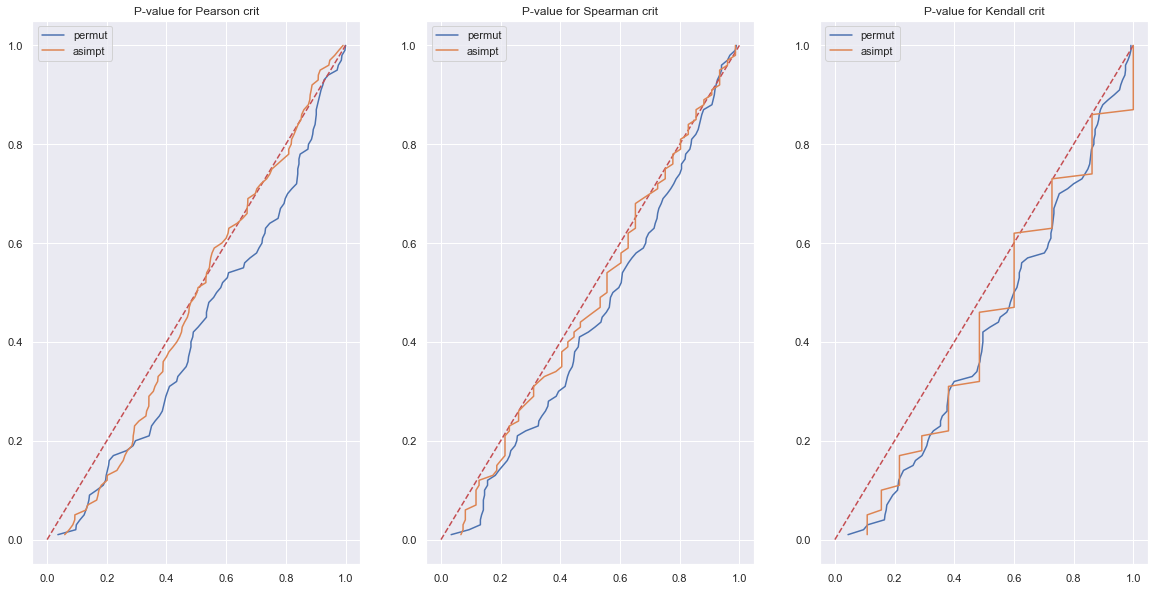

Критерии Спирмена и Кендалла к этим же данным:
SpearmanrResult(correlation=-0.01818181818181818, pvalue=0.9602404181286243)
KendalltauResult(correlation=0.022222222222222223, pvalue=1.0)


In [17]:
circle_test(10)

Частота Pearson: 0.01
Частота Spearman: 0.03
Частота Kendall: 0.0


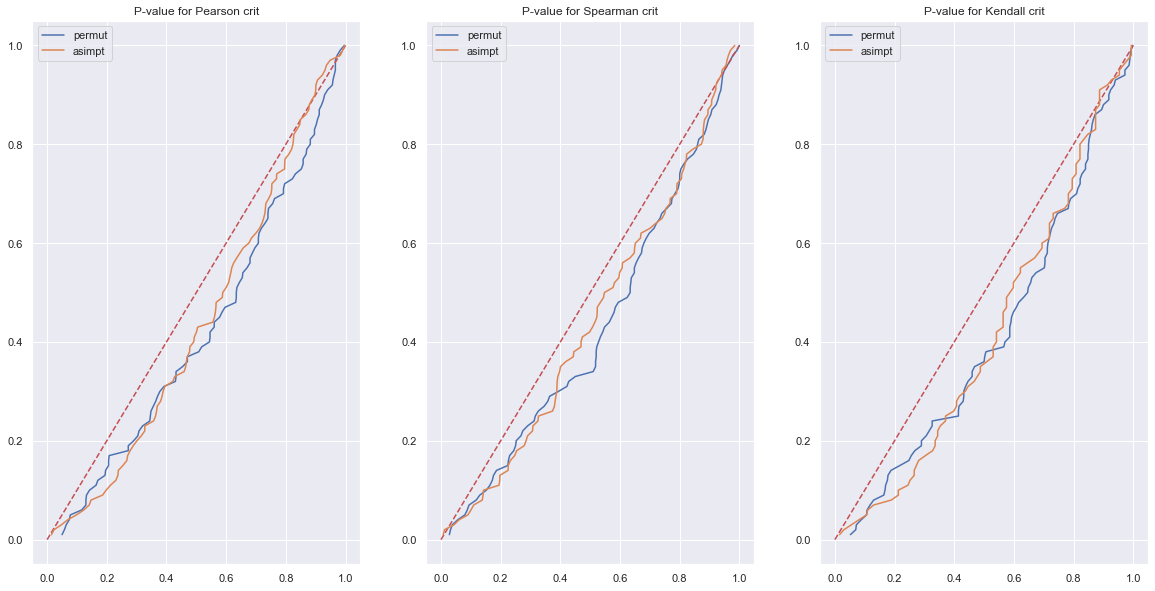

Критерии Спирмена и Кендалла к этим же данным:
SpearmanrResult(correlation=-0.006674669867947179, pvalue=0.963307241339838)
KendalltauResult(correlation=-0.013877551020408163, pvalue=0.8869199923303159)


In [15]:
circle_test(50)

Частота Pearson: 0.0
Частота Spearman: 0.0
Частота Kendall: 0.0


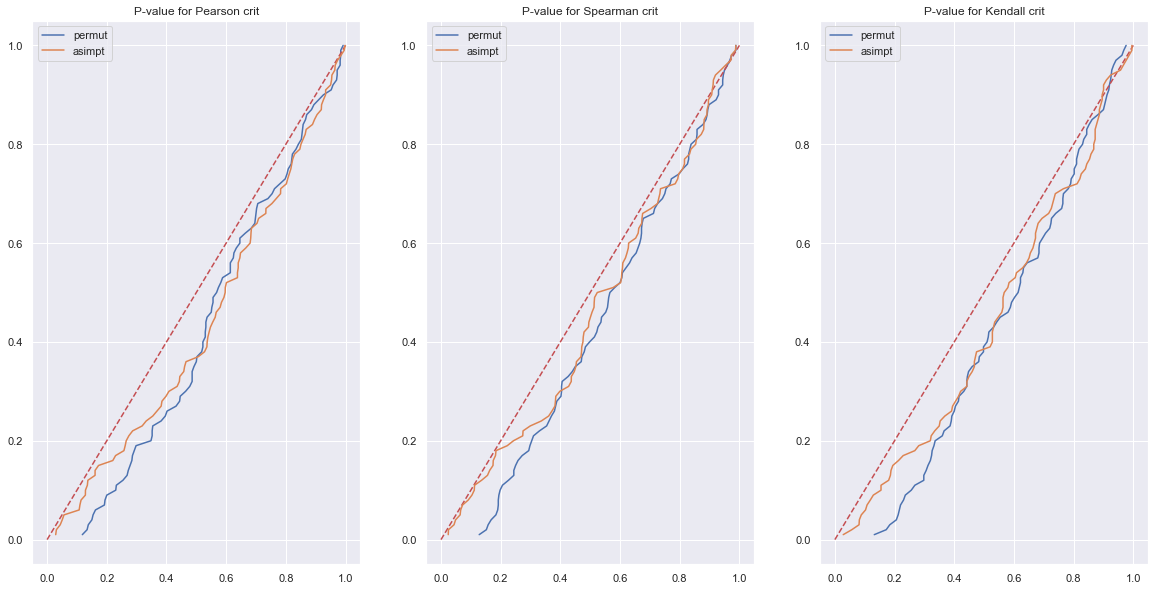

Критерии Спирмена и Кендалла к этим же данным:
SpearmanrResult(correlation=-0.04234023402340234, pvalue=0.6757520782620889)
KendalltauResult(correlation=-0.030707070707070714, pvalue=0.6507836830566431)


In [18]:
circle_test(100)

<h4>Случайно брошенные в кольцо $ {(x, y): 2/3 <= x^2 + y^2 <= 1 }$ 

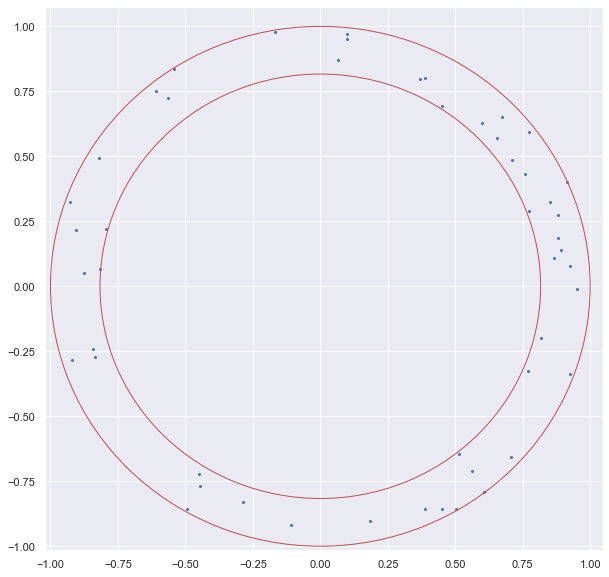

In [25]:
ring_pt(50, True)
plt.show()

In [16]:
def ring_test(n=50):
   # X, Y = ring_pt(n)
    count = [0, 0, 0]
    pvalue_p, pvalue_s, pvalue_k = list(), list(), list()
    for i in range(100):
        X, Y = ring_pt(n)
        res, pval =  permutation_criterion_(X, Y, 0.05, 'pearson')
        pvalue_p.append(pval)
        if res == 1:
            count[0]+= 1
        res, pval = 0, 0
            
        res, pval = permutation_criterion_(X, Y, 0.05, 'spearman')
        pvalue_s.append(pval)
        if res == 1:
            count[1] += 1
        res, pval = 0, 0    
        
        res, pval = permutation_criterion_(X, Y, 0.05, 'kendall')
        pvalue_k.append(pval)
        if res == 1:
            count[2] += 1
        res, pval = 0, 0
        
    print('Частота Pearson:', count[0]/100)
    print('Частота Spearman:', count[1]/100)
    print('Частота Kendall:', count[2]/100)
    
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))
    domain = np.linspace(0, 1, 2)
    dom_Y = [i/100 for i in range(1, 101)]
    pvalue_p.sort()
    pvalue_s.sort()
    pvalue_k.sort()
    
    ax[0].plot(pvalue_p, dom_Y, label='permut')
    ax[0].plot(domain, domain, '--r')
    ax[0].set_title('P-value for Pearson crit')
    
    ax[1].plot(pvalue_s, dom_Y, label='permut')
    ax[1].plot(domain, domain, '--r')
    ax[1].set_title('P-value for Spearman crit')
    
    ax[2].plot(pvalue_k, dom_Y, label='permut')
    ax[2].plot(domain, domain, '--r')
    ax[2].set_title('P-value for Kendall crit')
    
    pvalue_p, pvalue_s, pvalue_k = list(), list(), list()
    
    #Asimpt 
    for i in range(100): 
        X, Y = ring_pt(n)
        
        pvalue_s.append(sts.spearmanr(X, Y)[1])
        pvalue_k.append(sts.kendalltau(X, Y)[1])
        pvalue_p.append(sts.pearsonr(X, Y)[1])
    
    pvalue_s.sort()
    pvalue_k.sort()
    pvalue_p.sort()
    
    ax[0].plot(pvalue_p, dom_Y, label='asimpt')
    ax[1].plot(pvalue_s, dom_Y, label='asimpt')
    ax[2].plot(pvalue_k, dom_Y, label='asimpt')
    
    ax[0].legend()
    ax[1].legend()
    ax[2].legend()
    
    plt.show()
    
    print('Критерии Спирмена и Кендалла к этим же данным:')
    print(stats.spearmanr(X, Y))
    print(stats.kendalltau(X, Y))       

Частота Pearson: 0.01
Частота Spearman: 0.0
Частота Kendall: 0.0


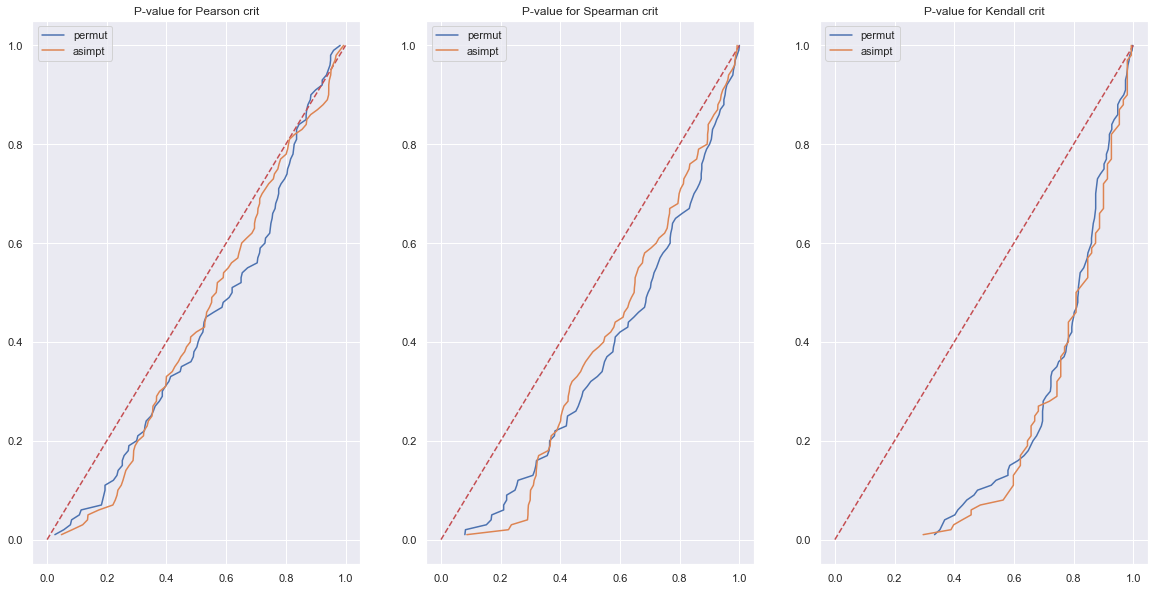

Критерии Спирмена и Кендалла к этим же данным:
SpearmanrResult(correlation=0.15169267707082834, pvalue=0.2929831694699452)
KendalltauResult(correlation=0.04979591836734694, pvalue=0.6098718972040122)


In [17]:
ring_test(50)

<h4> Случайно брошенные в ромб с вершинами: $\\ (0, 0), (1, 0), (1/\sqrt2, 1/\sqrt2), (1+1/\sqrt2, 1/\sqrt2) $.

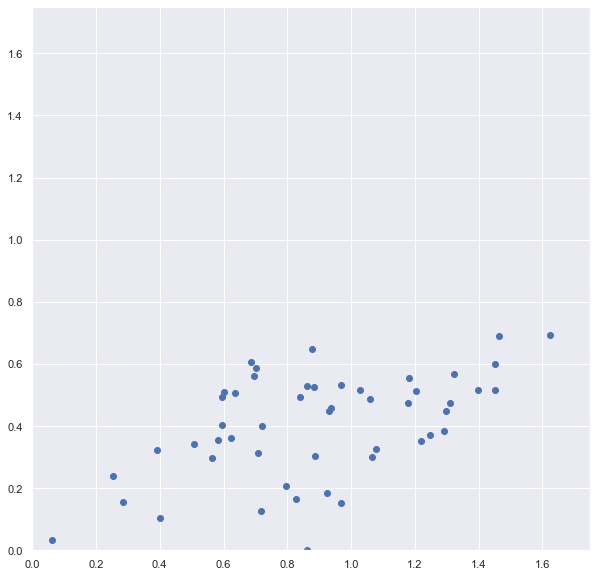

In [26]:
rhombus_pt(50, True)
plt.show()

In [18]:
def rhombus_test(n=50):
   # X, Y = rhombus_pt(n)
    count = [0, 0, 0]
    pvalue_p, pvalue_s, pvalue_k = list(), list(), list()
    for i in range(100):
        X, Y = rhombus_pt(n)
        res, pval =  permutation_criterion_(X, Y, 0.05, 'pearson')
        pvalue_p.append(pval)
        if res == 1:
            count[0]+= 1
        res, pval = 0, 0
            
        res, pval = permutation_criterion_(X, Y, 0.05, 'spearman')
        pvalue_s.append(pval)
        if res == 1:
            count[1] += 1
        res, pval = 0, 0    
        
        res, pval = permutation_criterion_(X, Y, 0.05, 'kendall')
        pvalue_k.append(pval)
        if res == 1:
            count[2] += 1
        res, pval = 0, 0
            
    print('Частота Pearson:', count[0]/100)
    print('Частота Spearman:', count[1]/100)
    print('Частота Kendall:', count[2]/100)
    
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))
    domain = np.linspace(0, 1, 2)
    dom_Y = [i/100 for i in range(1, 101)]
    pvalue_p.sort()
    pvalue_s.sort()
    pvalue_k.sort()
    
    ax[0].plot(pvalue_p, dom_Y, label='permut')
    ax[0].plot(domain, domain, '--r')
    ax[0].set_title('P-value for Pearson crit')
    
    ax[1].plot(pvalue_s, dom_Y, label='permut')
    ax[1].plot(domain, domain, '--r')
    ax[1].set_title('P-value for Spearman crit')
    
    ax[2].plot(pvalue_k, dom_Y, label='permut')
    ax[2].plot(domain, domain, '--r')
    ax[2].set_title('P-value for Kendall crit')
    
    pvalue_p, pvalue_s, pvalue_k = list(), list(), list()
    
    #Asimpt 
    for i in range(100): 
        X, Y = rhombus_pt(n)
        
        pvalue_s.append(sts.spearmanr(X, Y)[1])
        pvalue_k.append(sts.kendalltau(X, Y)[1])
        pvalue_p.append(sts.pearsonr(X, Y)[1])
    
    pvalue_s.sort()
    pvalue_k.sort()
    pvalue_p.sort()
    
    ax[0].plot(pvalue_p, dom_Y, label='asimpt')
    ax[1].plot(pvalue_s, dom_Y, label='asimpt')
    ax[2].plot(pvalue_k, dom_Y, label='asimpt')
    
    ax[0].legend()
    ax[1].legend()
    ax[2].legend()
    
    plt.show()
    
    print('Критерии Спирмена и Кендалла к этим же данным:')
    print(stats.spearmanr(X, Y))
    print(stats.kendalltau(X, Y)) 

Частота Pearson: 1.0
Частота Spearman: 1.0
Частота Kendall: 1.0


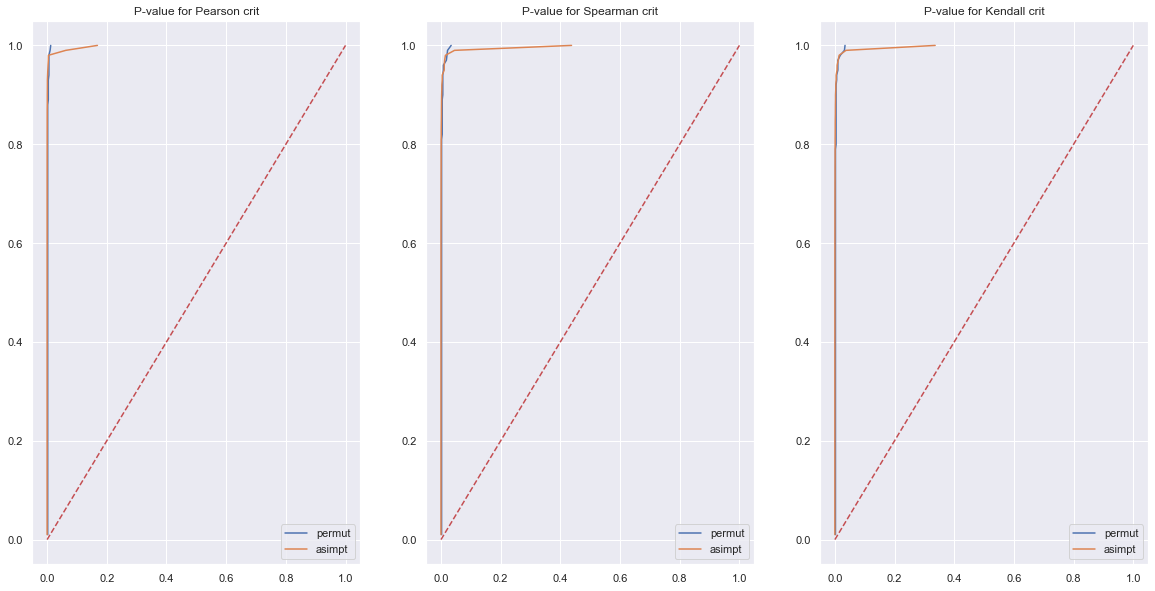

Критерии Спирмена и Кендалла к этим же данным:
SpearmanrResult(correlation=0.5981752701080433, pvalue=4.483962672497204e-06)
KendalltauResult(correlation=0.4204081632653061, pvalue=1.6481055909066134e-05)


In [19]:
rhombus_test(50)

$X ~ R[0, 1] , Z ~ R[0, 1/3], Y = X^2 + Z$

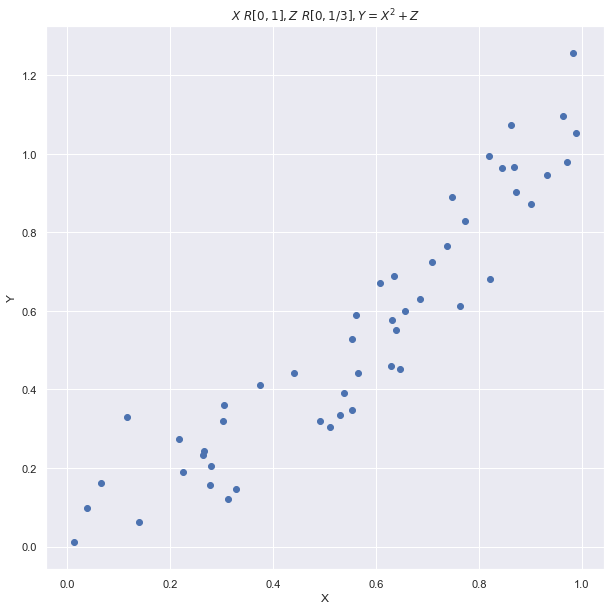

In [27]:
X = sts.uniform.rvs(loc=0, scale=1, size=50)
Z = sts.uniform.rvs(loc=0, scale=1/3, size=50)
Y = np.power(X, 2) + Z
fig, ax = plt.subplots(figsize=(10,10))
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('$X ~ R[0, 1] , Z ~ R[0, 1/3], Y = X^2 + Z$')
ax.scatter(X, Y)
plt.savefig('linear.png')

In [20]:
def depend_test(n=50):
  #  X = stats.uniform.rvs(size=n)
  #  Z = stats.norm.rvs(loc=0, scale=1/3, size=n)
  #  Y = np.power(X, 2) + Z
    count = [0, 0, 0]
    pvalue_p, pvalue_s, pvalue_k = list(), list(), list()
    for i in range(100):
        X = stats.uniform.rvs(size=n)
        Z = stats.norm.rvs(loc=0, scale=1/3, size=n)
        Y = np.power(X, 2) + Z
        res, pval =  permutation_criterion_(X, Y, 0.05, 'pearson')
        pvalue_p.append(pval)
        if res == 1:
            count[0]+= 1
        res, pval = 0, 0
            
        res, pval = permutation_criterion_(X, Y, 0.05, 'spearman')
        pvalue_s.append(pval)
        if res == 1:
            count[1] += 1
        res, pval = 0, 0    
        
        res, pval = permutation_criterion_(X, Y, 0.05, 'kendall')
        pvalue_k.append(pval)
        if res == 1:
            count[2] += 1
        res, pval = 0, 0
            
    print('Частота Pearson:', count[0]/100)
    print('Частота Spearman:', count[1]/100)
    print('Частота Kendall:', count[2]/100)
    
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 10))
    domain = np.linspace(0, 1, 2)
    dom_Y = [i/100 for i in range(1, 101)]
    pvalue_p.sort()
    pvalue_s.sort()
    pvalue_k.sort()
    
    ax[0].plot(pvalue_p, dom_Y, label='permut')
    ax[0].plot(domain, domain, '--r')
    ax[0].set_title('P-value for Pearson crit')
    
    ax[1].plot(pvalue_s, dom_Y, label='permut')
    ax[1].plot(domain, domain, '--r')
    ax[1].set_title('P-value for Spearman crit')
    
    ax[2].plot(pvalue_k, dom_Y, label='permut')
    ax[2].plot(domain, domain, '--r')
    ax[2].set_title('P-value for Kendall crit')
    
    pvalue_p, pvalue_s, pvalue_k = list(), list(), list()
    
    #Asimpt 
    for i in range(100): 
        X = stats.uniform.rvs(size=n)
        Z = stats.norm.rvs(loc=0, scale=1/3, size=n)
        Y = np.power(X, 2) + Z
        
        pvalue_s.append(sts.spearmanr(X, Y)[1])
        pvalue_k.append(sts.kendalltau(X, Y)[1])
        pvalue_p.append(sts.pearsonr(X, Y)[1])
    
    pvalue_s.sort()
    pvalue_k.sort()
    pvalue_p.sort()
    
    ax[0].plot(pvalue_p, dom_Y, label='asimpt')
    ax[1].plot(pvalue_s, dom_Y, label='asimpt')
    ax[2].plot(pvalue_k, dom_Y, label='asimpt')
    
    ax[0].legend()
    ax[1].legend()
    ax[2].legend()
    
    plt.show()
    
    print('Критерии Спирмена и Кендалла к этим же данным:')
    print(stats.spearmanr(X, Y))
    print(stats.kendalltau(X, Y)) 

Частота Pearson: 1.0
Частота Spearman: 1.0
Частота Kendall: 1.0


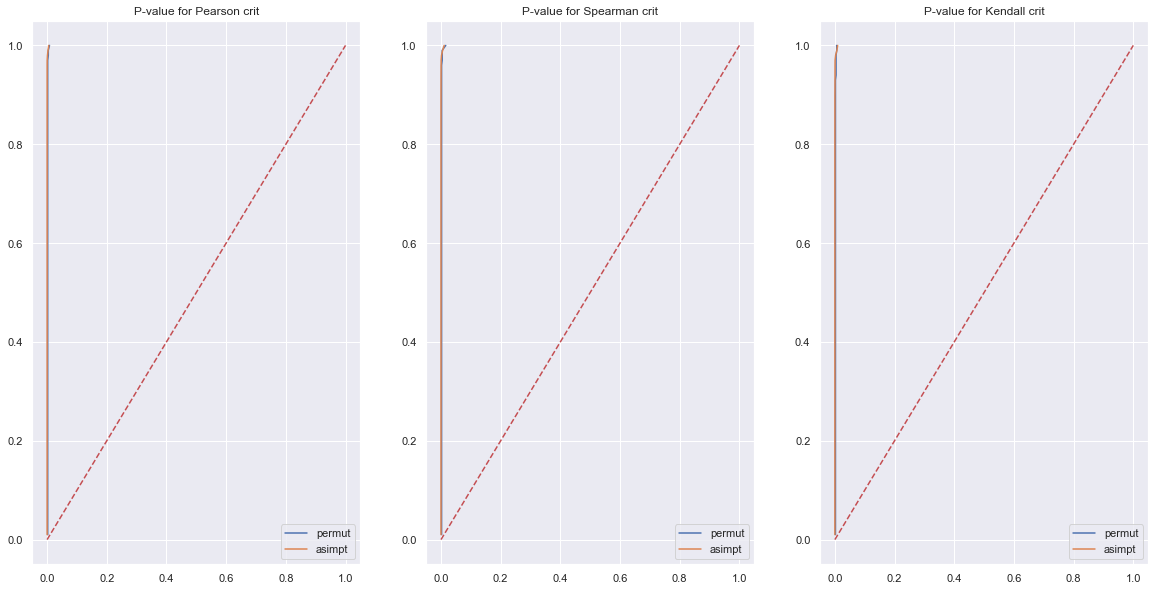

Критерии Спирмена и Кендалла к этим же данным:
SpearmanrResult(correlation=0.7087154861944778, pvalue=8.473141948416853e-09)
KendalltauResult(correlation=0.52, pvalue=9.907387181591797e-08)


In [21]:
depend_test(50)